<h2> Convolutional Neural Networks </h2> 

<h3> The visual cortex </h3> 

- The visual cortex has a small local receptive field

- They react to only visual stimuli located in a limited region of the visual field

- The receptive fields of different neurons may overlap and they tile the visual field

- Some neurons reach to horizontal lines, while others react to those of different orientations 

- Some neurons have larger receptive fields and react to more complex patterns that are combinations of lower level patterns. 

- This means that high level neurons are combinations of lower level neurons. 




<h3> Tensorflow implementation of CNN </h3> 

In [1]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg")/255

In [2]:
china.shape

(427, 640, 3)

In [3]:
flower.shape

(427, 640, 3)

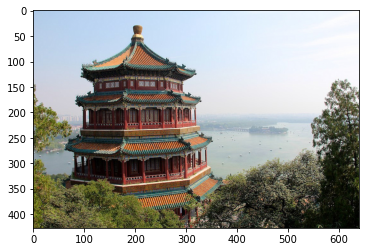

In [4]:
import matplotlib.pyplot as plt
plt.imshow(china)

In [5]:
import numpy as np
images = np.array([china,flower])

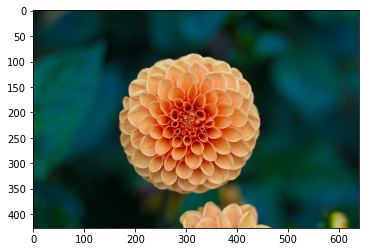

In [6]:
import matplotlib.pyplot as plt
plt.imshow(images[1])

In [7]:
#create a single batch with 2 images in it
batch_size,height,width,channels = images.shape

In [8]:
#create 2 filters (2 filters, for one convolutional layer, 2 feature maps)
filters = np.zeros(shape = (7,7,channels,2), dtype = np.float32)

In [9]:
import tensorflow as tf
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

In [10]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


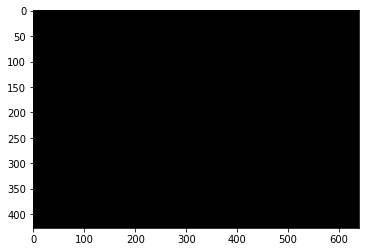

In [11]:
plt.imshow(outputs[0,:,:,1],cmap = "gray")


In [12]:
a = np.array([[0,1,0],[0,1,0],[0,1,0]])
b = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [13]:
a

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [14]:
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [15]:
np.matmul(a,b)

array([[4, 5, 6],
       [4, 5, 6],
       [4, 5, 6]])

<h3> Worked Example of 1D convolutional layer </h3> 

https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/

In [16]:
#define a one dimensional input that has 8 elements
#However this input data needs to be adjusted to have shape [sample no, length, channel]
data = np.asarray([0,0,0,1,1,0,0,0])
data = data.reshape(1,8,1)

In [17]:
#create a model with a single filter with a shape of 3. Keras refers to the shape of the filter as kernel_size
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(1,3,input_shape = (8,1)))

In [18]:
#define a 3 element filter which looks as follows
#The convolutional layer also has a bias input value that requires a weight that we set to zero.  
model.weights

[<tf.Variable 'conv1d/kernel:0' shape=(3, 1, 1) dtype=float32, numpy=
 array([[[ 0.11624265]],
 
        [[-0.6084974 ]],
 
        [[-0.14736938]]], dtype=float32)>,
 <tf.Variable 'conv1d/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [19]:
weights = [np.asarray([[[0]],[[1]],[[0]]]),np.asarray([0.0])]

In [20]:
weights

[array([[[0]],
 
        [[1]],
 
        [[0]]]),
 array([0.])]

In [21]:
model.set_weights(weights)

In [22]:
model.get_weights()

[array([[[0.]],
 
        [[1.]],
 
        [[0.]]], dtype=float32),
 array([0.], dtype=float32)]

In [23]:
#Applying the single filter on the input data
yhat = model.predict(data)

In [24]:
yhat

array([[[0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.]]], dtype=float32)

IMPORTANT 

When we define a 2D layer, we need to provide 4 dimensions. The first dimension defines how many input samples, second dimension is number of rows, third dimension is number of columns and last dimension is number of channels. 

<h3> Working a 2D Convolutional Layer </h3> 

The bump detection example from the previous 1D example, can be made to a two dimensional image. 

Here your input data needs to be adjusted to shape (sample no, rows, columns, channels)

In [25]:
data_2d = [[0,0,0,1,1,0,0,0],
           [0,0,0,1,1,0,0,0],
           [0,0,0,1,1,0,0,0],
           [0,0,0,1,1,0,0,0],
           [0,0,0,1,1,0,0,0],
           [0,0,0,1,1,0,0,0],
           [0,0,0,1,1,0,0,0],
           [0,0,0,1,1,0,0,0]]
data_2d = np.array(data_2d)

In [26]:
data_2d = data_2d.reshape(1,8,8,1)

In [27]:
data_2d

array([[[[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]]]])

In [28]:
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [np.asarray(detector), np.asarray([0.0])]

In [29]:
model_2d = tf.keras.models.Sequential()
model_2d.add(tf.keras.layers.Conv2D(1,(3,3),input_shape = (8,8,1)))

In [30]:
model_2d.set_weights(weights)
print(model_2d.get_weights())

[array([[[[0.]],

        [[1.]],

        [[0.]]],


       [[[0.]],

        [[1.]],

        [[0.]]],


       [[[0.]],

        [[1.]],

        [[0.]]]], dtype=float32), array([0.], dtype=float32)]


In [31]:
yhat = model_2d.predict(data_2d)

In [32]:
yhat.shape

(1, 6, 6, 1)

In [33]:
yhat.shape[1]

6

In [34]:
for r in range(yhat.shape[1]):
    print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


In [35]:
#first your 3x3 filter is applied to the top left corner of the image(image patch of 3x3 elements). 
m1 = np.asarray([[1,2,3],
                 [4,5,6],
                 [7,8,9]])
m2 = np.asarray([[0,1,0],
                 [0,1,0],
                 [0,1,0]])

In [36]:
np.matmul(m1,m2)

array([[ 0,  6,  0],
       [ 0, 15,  0],
       [ 0, 24,  0]])

In [37]:
np.dot(m1,m2)

array([[ 0,  6,  0],
       [ 0, 15,  0],
       [ 0, 24,  0]])

In [38]:
np.tensordot(m1,m2)

array(15)

In [39]:
#np.tensordot does element wise multiplication and then sums the entire result
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]

In [40]:
#the shape of the weights is [height of receptive field, width of receptive field, number of feature maps in previous layer, number of feature maps in current layer]
np.asarray(detector).shape

(3, 3, 1, 1)

In [41]:
detector_2 = [[0,1,0],
              [0,1,0],
              [0,1,0]]

In [42]:
np.asarray(detector_2).shape

(3, 3)

In [43]:
np.asarray(detector_2).reshape((3,3,1,1))

array([[[[0]],

        [[1]],

        [[0]]],


       [[[0]],

        [[1]],

        [[0]]],


       [[[0]],

        [[1]],

        [[0]]]])

In [44]:
#setting your filter using keras itself
conv = tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = "SAME", activation = "relu")
model_3 = tf.keras.models.Sequential()
model_3.add(conv)

In [45]:
np.sum(np.ones((5,5,3,200)))

15000.0

In [46]:
images.shape[0]

2

In [47]:
#function to crop images
def crop(images):
    return images[150:220,130:250]

In [48]:
cropped_result = crop(images)

In [50]:
outputs = tf.nn.conv2d(cropped_result,filters,strides = 1, padding = "SAME")

In [51]:
plt.imshow(outputs[0,:,:,1],cmap = "gray")

InvalidArgumentError: slice index 0 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

<h3> Manually adding Padding </h3> 

In [ ]:
def feature_map_size(input_size, kernel_size, strides=1, padding="SAME"):
    if padding == "SAME":
        return (input_size - 1) // strides + 1
    else:
        return (input_size - kernel_size) // strides + 1

In [ ]:
def pad_before_and_padded_size(input_size, kernel_size, strides=1):
    fmap_size = feature_map_size(input_size, kernel_size, strides)
    padded_size = max((fmap_size - 1) * strides + kernel_size, input_size)
    pad_before = (padded_size - input_size) // 2
    return pad_before, padded_size

In [ ]:
def manual_same_padding(images, kernel_size, strides = 1):
    if kernel_size == 1:
        return images.astype(np.float32)
    batch_size,height,width,channels = images.shape
    top_pad,padded_height = pad_before_and_padded_size(height,kernel_size=7,strides=1)
    left_pad,padded_width = pad_before_and_padded_size(width,kernel_size=7,strides=1)
    padded_shape = [batch_size,padded_height,padded_width,channels]
    padded_result = np.zeros((batch_size,padded_height,padded_width,channels), dtype = np.float32)
    padded_result[:,top_pad:top_pad + height,left_pad:left_pad+padded_width,:] = images
    return padded_result

<h3> Pooling Layers </h3> 

They work to shrink the input image in order to reduce the computational load, memory usage and the number of parameters. 

In a pooling layer, each layer is connected to the outputs of a limited number of neurons in the previous layer, located in a rectangular receptive layer. 

Pooling neurons do not have weights, all it does is aggregate the inputs using an aggregation function such as max or mean. 

It just applies a function to it's input receptive field to get only one value output. 

A pooling layer also introduces some invariance to small translations. This can be useful where a prediction should not depend on these details such as in classification tasks. 

A max pooling layer has its downsides:
- It is very destructive
- The outputs can become very small compared to the input. 

Stacking convolutional layers allows layers close to the input to learn low level features and layers deeper in the model to learn high-order features. 

However feature map output of convolutional layers is that they record the precise position of features in the input. Small movements in the position of a feature will change the classification. An approach is to do down sampling, where we transform the input of the previous feature map, to contain either the strongest input or the mean. 

A pooling layer is usually added after a non linearity like a activation layer has been applied on the feature maps. The pooling layer acts on each feature layer separately to create a new set of same number of pooled feature maps. 

Typically, a pooling filter is 2x2 with stride of 2. It means that the feature map, after pooling will reduce in size by a factor of 2. 

A pooling layer is specified rather than being learned.

In feature maps, features tend to encode the spatial presence of some pattern or concept over different tiles of the feature map, and its more informative to look at the maximal presence of different features than at their average presence. 


In [ ]:
#pooling layer in Tensorflow
#In a tensorflow pooling layer, the stride size will default to the size of the kernel. Also there is no padding used
#Average pooling can be used through tf.keras.layers.AvgPool2D. 
#However while average pooling loses less information from the layer, maximum pooling allows to get the strongest signal to the next layer. 
max_pool = tf.keras.layers.MaxPool2D(pool_size = 2)

In [ ]:
cropped_images = np.array([crop(image) for image in images], dtype = np.float32)

In [ ]:
output = max_pool(cropped_images)

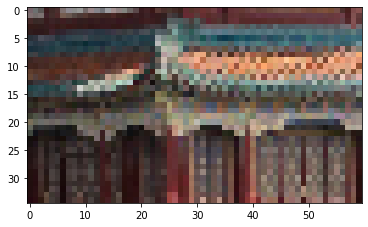

In [ ]:
plt.imshow(output[0])

In [ ]:
data = [[0,0,0,1,1,0,0,0],
        [0,0,0,1,1,0,0,0],
        [0,0,0,1,1,0,0,0],
        [0,0,0,1,1,0,0,0],
        [0,0,0,1,1,0,0,0],
        [0,0,0,1,1,0,0,0],
        [0,0,0,1,1,0,0,0],
        [0,0,0,1,1,0,0,0]]
data = np.asarray(data)
data = data.reshape(1,8,8,1)

In [ ]:
import tensorflow as tf
#single convolutional layer with a single filter with shape 3 by 3
filterlayer = tf.keras.layers.Conv2D(filters = 1, kernel_size=(3,3), activation='relu',input_shape = (8,8,1))

In [ ]:
model = tf.keras.models.Sequential()
model.add(filterlayer)

In [ ]:
model.get_weights()

[array([[[[ 0.01077861]],
 
         [[ 0.04305929]],
 
         [[-0.2713099 ]]],
 
 
        [[[ 0.37363815]],
 
         [[ 0.4282757 ]],
 
         [[ 0.11019117]]],
 
 
        [[[-0.2546686 ]],
 
         [[ 0.2219938 ]],
 
         [[-0.48365808]]]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
new_weights = np.array([[0,1,0],
                        [0,1,0],
                        [0,1,0]])
new_weights = new_weights.reshape(3,3,1,1)
new_weights = [new_weights, np.array([0.0])]

In [ ]:
model.set_weights(new_weights)
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 1) dtype=float32, numpy=
 array([[[[0.]],
 
         [[1.]],
 
         [[0.]]],
 
 
        [[[0.]],
 
         [[1.]],
 
         [[0.]]],
 
 
        [[[0.]],
 
         [[1.]],
 
         [[0.]]]], dtype=float32)>,
 <tf.Variable 'conv2d/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [ ]:
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
np.array(detector)

array([[[[0]],

        [[1]],

        [[0]]],


       [[[0]],

        [[1]],

        [[0]]],


       [[[0]],

        [[1]],

        [[0]]]])

In [ ]:
yhat = model.predict(data)
yhat

array([[[[0.],
         [0.],
         [3.],
         [3.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [3.],
         [3.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [3.],
         [3.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [3.],
         [3.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [3.],
         [3.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [3.],
         [3.],
         [0.],
         [0.]]]], dtype=float32)

In [ ]:
yhat.shape

(1, 6, 6, 1)

In [ ]:
#pretty print

for i in np.arange(yhat.shape[1]):
    print([int(yhat[:,i,j,:]) for j in np.arange(yhat.shape[2])])

[0, 0, 3, 3, 0, 0]
[0, 0, 3, 3, 0, 0]
[0, 0, 3, 3, 0, 0]
[0, 0, 3, 3, 0, 0]
[0, 0, 3, 3, 0, 0]
[0, 0, 3, 3, 0, 0]


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 6, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#average pooling
model = tf.keras.models.Sequential()
model.add(filterlayer)
model.add(tf.keras.layers.AveragePooling2D())

In [ ]:
yhat_averagepooled = model.predict(data)


In [ ]:
for i in np.arange(yhat_averagepooled.shape[1]):
    print([int(yhat_averagepooled[:,i,j,:]) for j in np.arange(yhat_averagepooled.shape[2])])

[0, 3, 0]
[0, 3, 0]
[0, 3, 0]


In [ ]:
#max pooling
model = tf.keras.models.Sequential()
model.add(filterlayer)
model.add(tf.keras.layers.MaxPool2D())

In [ ]:
yhat_maxpooled = model.predict(data)

In [ ]:
for i in np.arange(yhat_maxpooled.shape[1]):
    print([int(yhat_maxpooled[:,i,j,:]) for j in np.arange(yhat_maxpooled.shape[2])])

[0, 3, 0]
[0, 3, 0]
[0, 3, 0]


<h3> CNN Architectures </h3>

In a typical CNN architecture, we have the convolutional layer which is followed by activation layer (ReLU). After which a pooling layer is applied. The outputs of the pooling layer on each previous feature layer is then applied through another set of filters. This continues, making the input smaller across the network. 

Typically we want to use a filter which is not too large. 3x3 filter tends to be better than a 5x5 filter, as it requires less computation. 

However in general, using a slightly larger filter for the first layer is better. 

In [52]:
from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size = 3, activation = 'relu',padding = "SAME")
model_cnn = tf.keras.models.Sequential()

In [53]:
model_cnn.add(DefaultConv2D(filters=64,kernel_size = 7, input_shape=[28,28,1]))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
model_cnn.add(DefaultConv2D(filters = 128))
model_cnn.add(DefaultConv2D(filters = 128))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
model_cnn.add(DefaultConv2D(filters = 256))
model_cnn.add(DefaultConv2D(filters = 256))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(units=128,activation="relu"))
model_cnn.add(tf.keras.layers.Dropout(0.5))
model_cnn.add(tf.keras.layers.Dense(units=64,activation="relu"))
model_cnn.add(tf.keras.layers.Dropout(0.5))
model_cnn.add(tf.keras.layers.Dense(units=10,activation="softmax"))

In [ ]:
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 256)        

As a network grows, the number of feature layers also tends to increase in a convolutional layer. This is because in the lower layers, we tends to have low level features with less possible combinations, but as we go up a network, the possible combinations also increase. Hence the number of maps per layer increases. 

In [54]:
from tensorflow import keras
#trying the above model on the Fashion MNIST problem
(X_train_full,y_train_full),(X_test,y_test) =  keras.datasets.fashion_mnist.load_data()
X_train,X_valid = X_train_full[:-5000],X_train_full[-5000:]
y_train,y_valid = y_train_full[:-5000],y_train_full[-5000:]
X_mean = X_train.mean(axis = 0, keepdims = True)
X_std = X_train.std(axis = 0, keepdims = True) + 1e-7

In [55]:
#normalizing X_train,X_valid,X_test
X_train = (X_train - X_mean)/X_std
X_valid = (X_valid - X_mean)/X_std
X_test = (X_test - X_mean)/X_std

In [56]:
#as the input to the CNN needs to be 4D, we have to add one more dimension to it
X_train = X_train[...,np.newaxis]
X_valid = X_valid[...,np.newaxis]
X_test = X_test[...,np.newaxis]

In [57]:
model_cnn.compile(loss = "sparse_categorical_crossentropy",optimizer = "nadam",
metrics = ["accuracy"])
history = model_cnn.fit(X_train,y_train, validation_data=(X_valid,y_valid), epochs = 5)

Epoch 1/5
 639/1719 [==========>...................] - ETA: 1:14 - loss: 1.0272 - accuracy: 0.6347

KeyboardInterrupt: 

In [ ]:
rrrrrr

<h3>LeNet-5</h3>

In [ ]:
batch_size, height, width, channels, _ = X_train.shape

In [ ]:
def add_set_padding(images, padding_size_vertical,padding_size_horizontal):
    batch_size, height, width, channels = images.shape
    padding_vertical_addition = (padding_size_vertical - height)//2
    padding_horizontal_addition = (padding_size_horizontal - width)//2
    padded_result = np.zeros((batch_size,padding_size_vertical,padding_size_horizontal,channels), dtype = np.float32)
    padded_result[:,padding_vertical_addition:padding_vertical_addition + height,padding_horizontal_addition:padding_horizontal_addition+width,:] = images
    return padded_result

In [ ]:
LeNetConv2D = partial(tf.keras.layers.Conv2D, kernel_size = 3, activation = 'tanh',padding = "VALID")
model_lenet = tf.keras.models.Sequential()

In the LeNet-5 architecture, instead of using the typical dot product between the penultimate layers unit outputs and the weights on the final layers neurons, for the final layer, it outputs the square of the euclidean distance between the input vector and its weight vector, and applies exponent to it. 

In [ ]:
#as the LeNet network uses a custom RBF layer, we shall create a custom layer

class customRBF(tf.keras.layers.Layer):
    def __init__(self,units,initializer = None, betas = 1.0, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        if initializer == None:
            self.initializer = "glorot_normal"
        else:
            self.initializer = initializer
        self.init_betas = betas
    def build(self,batch_input_shape):
        self.weight_centers = self.add_weight(name = "weight_centers", 
                        shape = [self.units, batch_input_shape[1]],
                        initializer = self.initializer,
                        trainable = True)
        self.betas = self.add_weight(name = "betas",
                        shape = [self.units],
                        initializer = tf.keras.initializers.Constant(value = self.init_betas),trainable = True)
        super().build(batch_input_shape)
    def call(self, X):
        #X shape is going to be [batchsize,no. of units of previous layer]
        #Expand dims makes the [no. of units of this layer,no. of incoming #features(no of units in prev layer)] into a 3D array by adding one more #dimension. 
        #This allows us to substract the incoming input transpose[no. of units in #previous layer, batchsize] with each entry in the expand dimes result
        C = tf.keras.backend.expand_dims(self.weight_centers)
        H = tf.keras.backend.transpose(C - tf.keras.backend.transpose(X))
        return tf.keras.backend.exp(-self.betas*tf.keras.backend.sum(H**2,axis = 1))
    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[0] + [self.units])



In [ ]:
model_lenet.add(LeNetConv2D(filters = 6,kernel_size = 5,strides = 1,input_shape = [32,32,1]))
model_lenet.add(tf.keras.layers.AveragePooling2D(pool_size=2))
model_lenet.add(LeNetConv2D(filters = 16,kernel_size = 5,strides = 1))
model_lenet.add(tf.keras.layers.AveragePooling2D(pool_size=2))
model_lenet.add(LeNetConv2D(filters = 120,kernel_size = 5,strides = 1))
model_lenet.add(tf.keras.layers.Flatten())
model_lenet.add(tf.keras.layers.Dense(units=84,activation="tanh"))
model_lenet.add(customRBF(units = 10, betas = 0.5))

In [ ]:
model_lenet.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_9 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_10 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_5 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 84)              

In [ ]:
from tensorflow import keras
#trying the above model on the Fashion MNIST problem
(X_train_full,y_train_full),(X_test,y_test) =  keras.datasets.fashion_mnist.load_data()
X_train,X_valid = X_train_full[:-5000],X_train_full[-5000:]
y_train,y_valid = y_train_full[:-5000],y_train_full[-5000:]
X_mean = X_train.mean(axis = 0, keepdims = True)
X_std = X_train.std(axis = 0, keepdims = True) + 1e-7

In [ ]:
#normalizing X_train,X_valid,X_test
X_train = (X_train - X_mean)/X_std
X_valid = (X_valid - X_mean)/X_std
X_test = (X_test - X_mean)/X_std

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train = X_train[...,np.newaxis]
X_valid = X_valid[...,np.newaxis]
X_test = X_test[...,np.newaxis]

In [ ]:
X_train_padded = add_set_padding(X_train,32,32)
X_valid_padded = add_set_padding(X_valid,32,32)
X_test_padded = add_set_padding(X_test,32,32)

In [ ]:
model_lenet.compile(loss = "sparse_categorical_crossentropy",optimizer = "nadam",
metrics = ["accuracy"])
history = model_lenet.fit(X_train_padded,y_train, validation_data=(X_valid_padded,y_valid), epochs = 5)

Epoch 1/5
1719/1719 [==============================] - 29s 11ms/step - loss: 0.6138 - accuracy: 0.7835 - val_loss: 0.3776 - val_accuracy: 0.8626
Epoch 2/5
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3672 - accuracy: 0.8697 - val_loss: 0.3308 - val_accuracy: 0.8758
Epoch 3/5
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3182 - accuracy: 0.8853 - val_loss: 0.3226 - val_accuracy: 0.8784
Epoch 4/5
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2910 - accuracy: 0.8941 - val_loss: 0.3158 - val_accuracy: 0.8846
Epoch 5/5
1719/1719 [==============================] - 18s 10ms/step - loss: 0.2634 - accuracy: 0.9035 - val_loss: 0.2939 - val_accuracy: 0.8902


Above a CNN with the LeNet Architecture is trained on the MNIST dataset. It contains a custom RBF layer 

<h2> Data Augmentation </h2>

Artificially increasing the size of the training set by generating many realistic variants of each training instance. This also acts as a regularization technique. The generated instances should be as realistic as possible. 

<h3> Local Response Normalization </h3> 

The most strongly activated neurons inhibit other neurons located at the same position in neighboring feature maps belonging to the same convolutional layer. This allows different feature maps to specialize. 

<h3> Inception Module </h3>

The input signal is copied and fed to 4 different layers. All convolutional layers use the ReLU activation function. Prior to feeding it to the 4 different layers, 3 copies are first fed into 3 convolutional layers. Then this output along with the unchanged input copy is fed into 4 other convolutional layers. Then the outputs are concatenated on the depth dimension. 

<h3> ResNet </h3>

The key to building networks which are very deep is to use skip connections (short cut connections) in which the input is added to the output of a few layers higher up the stack.

Initially, when you model a network, and initialize it's weights, all these weights are closer to zero. Hence your output will also be closer to zero. However if we use **residual learning** and add in the input to this output, we end up modelling the input initially. This speeds up training.

ResNet starts with a 64 feature map convolutional layer, followed by max pooling. After the maxpooling, the residual units start where every 2 convolutional layers are follwed with a skip connection were the output from the 2 convolutional layers are added to the input that was sent into the respective convolution layer. 

As we move along the network, there is an increase in the number of feature maps with a halving of the height and width of the map, by an increase in the stride. As it is required to add the input to the output of the 2 convolutional layers, the size of the input also needs to be changed. To do this we use another layer to pass the inputs through to obtain the appropriate shape to be added. 

In [ ]:
#Implementing ResNet-34 from scratch

#making the default 2D  feature map using partial
from functools import partial
ResNetDefaultConv2D = partial(tf.keras.layers.Conv2D,kernel_size = 3, strides = 1, padding = "SAME", use_bias = False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides = 1, activation = "relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            ResNetDefaultConv2D(filters = filters,strides = strides),
            keras.layers.BatchNormalization(),
            self.activation,
            ResNetDefaultConv2D(filters = filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        #This condition is relevant because you will only need a changing of input size, if your stride size is greater than one which will reduce the size of the output from the convolutional layers. 
        if strides > 1:
            self.skip_layers = [
                ResNetDefaultConv2D(filters = filters, kernel_size = 1, strides = strides),
                keras.layers.BatchNormalization()
            ]
    def call(self,inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        input_Z = inputs
        for layer in self.skip_layers:
            input_Z = layer(input_Z)
        return self.activation(Z + input_Z)

In [ ]:
model_resnet = keras.models.Sequential()
model_resnet.add(ResNetDefaultConv2D(filters = 64, kernel_size = 7, strides = 2, input_shape = [28,28,1]))
model_resnet.add(keras.layers.BatchNormalization())
model_resnet.add(keras.layers.Activation("relu"))
model_resnet.add(keras.layers.MaxPooling2D(pool_size = 3, strides = 2,padding = "SAME"))
model_resnet.add(ResidualUnit(filters = 64))
model_resnet.add(ResidualUnit(filters = 64))
model_resnet.add(ResidualUnit(filters = 64))
model_resnet.add(ResidualUnit(filters = 128,strides=2))
model_resnet.add(ResidualUnit(filters = 128))
model_resnet.add(ResidualUnit(filters = 128))
model_resnet.add(ResidualUnit(filters = 128))
model_resnet.add(ResidualUnit(filters = 256,strides=2))
model_resnet.add(ResidualUnit(filters = 256))
model_resnet.add(ResidualUnit(filters = 256))
model_resnet.add(ResidualUnit(filters = 256))
model_resnet.add(ResidualUnit(filters = 256))
model_resnet.add(ResidualUnit(filters = 256))
model_resnet.add(ResidualUnit(filters = 512,strides = 2))
model_resnet.add(ResidualUnit(filters = 512))
model_resnet.add(ResidualUnit(filters = 512))
model_resnet.add(keras.layers.GlobalAvgPool2D())
model_resnet.add(keras.layers.Flatten())
model_resnet.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
from tensorflow import keras
#trying the above model on the Fashion MNIST problem
(X_train_full,y_train_full),(X_test,y_test) =  keras.datasets.fashion_mnist.load_data()
X_train,X_valid = X_train_full[:-5000],X_train_full[-5000:]
y_train,y_valid = y_train_full[:-5000],y_train_full[-5000:]
X_mean = X_train.mean(axis = 0, keepdims = True)
X_std = X_train.std(axis = 0, keepdims = True) + 1e-7

In [ ]:
X_train = (X_train - X_mean)/X_std
X_valid = (X_valid - X_mean)/X_std
X_test = (X_test - X_mean)/X_std

In [ ]:
X_train = X_train[...,np.newaxis]
X_valid = X_valid[...,np.newaxis]
X_test = X_test[...,np.newaxis]

model_resnet.compile(loss = "sparse_categorical_crossentropy",optimizer = "nadam",
metrics = ["accuracy"])
history = model_resnet.fit(X_train,y_train, validation_data=(X_valid,y_valid), epochs = 5)

In [ ]:
np.array_split(np.arange(100),20)

[array([0, 1, 2, 3, 4]),
 array([5, 6, 7, 8, 9]),
 array([10, 11, 12, 13, 14]),
 array([15, 16, 17, 18, 19]),
 array([20, 21, 22, 23, 24]),
 array([25, 26, 27, 28, 29]),
 array([30, 31, 32, 33, 34]),
 array([35, 36, 37, 38, 39]),
 array([40, 41, 42, 43, 44]),
 array([45, 46, 47, 48, 49]),
 array([50, 51, 52, 53, 54]),
 array([55, 56, 57, 58, 59]),
 array([60, 61, 62, 63, 64]),
 array([65, 66, 67, 68, 69]),
 array([70, 71, 72, 73, 74]),
 array([75, 76, 77, 78, 79]),
 array([80, 81, 82, 83, 84]),
 array([85, 86, 87, 88, 89]),
 array([90, 91, 92, 93, 94]),
 array([95, 96, 97, 98, 99])]

In [ ]:
#pretrained m odels for transfer learning
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras

In [ ]:
(train_set, valid_set,test_set),info = tfds.load("tf_flowers", as_supervised = True, split = ['train[0%:75%]', 'train[75%:90%]','train[90%:100%]'], with_info = True)

In [ ]:
dataset_size = info.splits["train"].num_examples

In [ ]:
class_names = info.features["label"]
class_names.names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [ ]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    #final_image = tf.image.random_crop(image, [224,224,3])
    #final_image = tf.image.random_flip_left_right(final_image)
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

In [ ]:
train_set = train_set.shuffle(1000).repeat()
train_set = train_set.map(preprocess).batch(32)
valid_set = valid_set.map(preprocess).batch(32)
test_set = test_set.map(preprocess).batch(32)

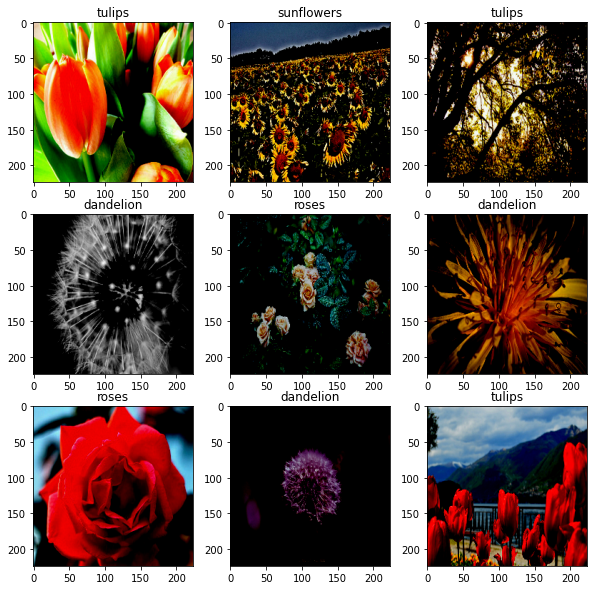

In [ ]:
fig,axs = plt.subplots(3,3, figsize = (10,10))
index = 0
i = 0
for image,label in train_set.take(9):
    axs[index,i].imshow(image[0,:,:,:])
    axs[index,i].set_title(info.features["label"].names[label[0]])
    if i == 2:
        index += 1
        i = 0
        continue
    
    i += 1

In [ ]:
#using pretrained CNN for transfer learning

base_model = keras.applications.xception.Xception(weights = "imagenet",include_top = False)
#avg = keras.layers.GlobalAveragePooling2D()(base_model)

In [ ]:
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(units = len(info.features["label"].names), activation = "softmax")(avg)
model = keras.models.Model(inputs = base_model.input, outputs = output)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
optimizer = keras.optimizers.SGD(lr = 0.2, momentum = 0.9, decay = 0.01)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer,metrics = "accuracy")

In [ ]:
history = model.fit(train_set, 
                    steps_per_epoch=int(0.75*dataset_size / 32),
                    validation_data = valid_set,
                    validation_steps = int(0.15*dataset_size / 32),
                    epochs = 5)   

(None, None, None, 3)

In [ ]:
train_set

<MapDataset shapes: ((224, 224, 3), ()), types: (tf.float32, tf.int64)>

<h3> Classification and Localization </h3>

To predict the bounding box of an onject in an image, it is common to predict the horizontal and vertical coordinates of the object's center as well as its height and width. 

To do this, we have to predict another 4 parameters. Hence we add a new dense layer to the global pooling layer. 

In [ ]:
#using pretrained CNN for transfer learning
base_model_loc = keras.applications.xception.Xception(weights = "imagenet",include_top = False)
avg_log = keras.layers.GlobalAveragePooling2D()(base_model_loc.output)
class_output = keras.layers.Dense(units = 10, activation = "softmax")(avg_log)
loc_output = keras.layers.Dense(units = 4)(avg_log)
model_loc = keras.models.Model(inputs = base_model_loc.input, outputs = [class_output,loc_output])
optimizer_loc = keras.optimizers.SGD(lr = 0.2, momentum = 0.9, decay = 0.01)
model_loc.compile(loss = ["sparse_categorical_crossentropy","mse"],
                  loss_weights = [0.8,0.2],
                  optimizer = optimizer_loc, metrics = ["accuracy"])

Given that you are predicting the class of the flowers and also trying to establish the bounding box around it, we need to use a tuple instead of just (images,label). Instead we need (image,(class_labels,bounding_boxes)).

<h3> Object Detection </h3>

Typically the image will be chopped into a grid, and then we will use a sliding window to move through the image, and the CNN will be applied to the input of each slot as the window passes through. However this has the drawback that it will detect the same object multiple times. 

<h3> Non max supression </h3>

- Add an extra prediction layer with a sigmoid activation where we predict if a particular object exists in that bounding box. If the result is below a threshold, remove the bounding box. 

- FInd bounding boxes with the highest score from the first step, then find the Intersection over Union of other bounding boxes with this bounding box, and drop the others. This is repeated until theres no bounding boxes to get rid off. 

<h3> Fully Convolutional Networks </h3>

Assume a CNN with 200 neurons as output and 100 feature maps below it with 7x7 size. 

In a FCN, we replace the output dense layer with 200 neurons(for example), with 200 convolutional layers, with 7x7 filters, causing each of the 200 convolutional layers to have 1x1 size(just a number).

Now the FCN output will be size [batch_size, 1,1,200]. 

To convert a dense layer to a convolutional layer, the number of filters in the convolutional layer much be equal to the number of units of the dense layer. The filter size much be equal to the size of a single input feature map. Also use valid padding.

The output size of applying filters, will be (feature map size(after SAME or even VALID) - filter size + 1)
.
